In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.dataframe import get_final_dataframe

df = get_final_dataframe("random_forest")

2025-05-05 12:53:47,941 - data_processing.data_preprocessing - INFO - Applied one-hot encoding to ['surface', 'tourney_level', 'winner_entry', 'loser_entry', 'winner_hand', 'loser_hand']
2025-05-05 12:53:48,504 - data_processing.data_preprocessing - INFO - Columns successfully dropped -> ['tourney_name', 'tourney_id', 'match_num', 'winner_name', 'loser_name', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'Unnamed: 0', 'loser_entry_S']
2025-05-05 12:53:48,567 - data_processing.data_preprocessing - INFO - 89263 rows dropped
2025-05-05 12:53:49,042 - utils.dataframe - INFO - 52925 winners assigned to player 1
2025-05-05 12:53:49,043 - utils.dataframe - INFO - 52808 winners assigned to player 2
2025-05-05 12:53:49,421 - data_processing.feature_engineering - INFO - Applying feature engineering


In [2]:
columns_to_remove = [
    "tourney_level_O", "player_1_entry_ITF", "player_1_entry_UP",
    "player_1_entry_W", "player_2_entry_ITF", "player_2_entry_UP",
    "player_2_entry_W"
]
df = df.drop(columns=[column for column in columns_to_remove])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105733 entries, 0 to 105538
Data columns (total 97 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   player_1_id                    105733 non-null  int64  
 1   player_1_seed                  105733 non-null  float64
 2   player_1_ht                    105733 non-null  float64
 3   player_1_ioc                   105733 non-null  int64  
 4   player_1_age                   105733 non-null  float64
 5   player_1_rank                  105733 non-null  float64
 6   player_1_rank_points           105733 non-null  float64
 7   player_1_entry_ALT             105733 non-null  bool   
 8   player_1_entry_Alt             105733 non-null  bool   
 9   player_1_entry_LL              105733 non-null  bool   
 10  player_1_entry_PR              105733 non-null  bool   
 11  player_1_entry_Q               105733 non-null  bool   
 12  player_1_entry_SE              1057

In [4]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [5]:
x_train = df[df["tourney_year"] < 2024].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < 2024]["player_1_won"]

x_test = df[df["tourney_year"] == 2024].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] == 2024]["player_1_won"]

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, shuffle=False)

In [6]:
x_train.tail()

player_1_id  player_1_seed  player_1_ht  player_1_ioc  player_1_age  \
102554       209098       0.166667        188.0            62          20.3   
102555       209414       0.500000        178.0            10          19.5   
102556       210506       0.250000        193.0             2          19.2   
102557       209406       0.125000        180.0            95          20.0   
102558       209098       0.166667        188.0            62          20.3   

        player_1_rank  player_1_rank_points  player_1_entry_ALT  \
102554       0.009091                 582.0               False   
102555       0.014286                 756.0               False   
102556       0.010309                 653.0               False   
102557       0.005405                 326.0               False   
102558       0.009091                 582.0               False   

        player_1_entry_Alt  player_1_entry_LL  ...  player_2_surface_elo  \
102554               False              False  ...           1536.100290   
102555               False              False  ...           1515.466401   
102556               False              False  ...           1708.604199   
102557               False              False  ...           1454.146604   
102558               False              False  ...           1512.746602   

        surface_elo_diff  player_1_last_5_elo_progress  \
102554        150.283293                      1.052415   
102555         -1.586727                      1.079932   
102556       -239.355927                      1.064419   
102557         23.648537                      1.000457   
102558        210.959264                      1.039391   

        player_2_last_5_elo_progress  player_1_last_10_elo_progress  \
102554                      1.026677                       1.152474   
102555                      0.948207                       1.025063   
102556                      1.059597                       1.103479   
102557                      1.004598                       1.005774   
102558                      0.997742                       1.116080   

        player_2_last_10_elo_progress  player_1_last_20_elo_progress  \
102554                       0.978012                       1.136066   
102555                       0.968312                       1.037987   
102556                       1.138242                       1.120204   
102557                       1.033802                       1.005774   
102558                       0.988688                       1.217887   

        player_2_last_20_elo_progress  player_1_last_50_elo_progress  \
102554                       1.003039                       1.136066   
102555                       0.968312                       1.099853   
102556                       1.165061                       1.120204   
102557                       1.089813                       1.005774   
102558                       0.988688                       1.183203   

        player_2_last_50_elo_progress  
102554                       1.069462  
102555                       0.968312  
102556                       1.165061  
102557                       1.089813  
102558                       0.988688  

[5 rows x 96 columns]

array([[<Axes: title={'center': 'player_1_id'}>,
        <Axes: title={'center': 'player_1_seed'}>,
        <Axes: title={'center': 'player_1_ht'}>,
        <Axes: title={'center': 'player_1_ioc'}>,
        <Axes: title={'center': 'player_1_age'}>,
        <Axes: title={'center': 'player_1_rank'}>,
        <Axes: title={'center': 'player_1_rank_points'}>,
        <Axes: title={'center': 'player_2_id'}>],
       [<Axes: title={'center': 'player_2_seed'}>,
        <Axes: title={'center': 'player_2_ht'}>,
        <Axes: title={'center': 'player_2_ioc'}>,
        <Axes: title={'center': 'player_2_age'}>,
        <Axes: title={'center': 'player_2_rank'}>,
        <Axes: title={'center': 'player_2_rank_points'}>,
        <Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'tourney_year'}>],
       [<Axes: title={'center': 'tourney_month'}>,
        <Axes: title={'center': 'tourney_day'}>,
        <Axes: title={'center': 'rank_diff'}>,
        <Axes: title={'center': 'rank_

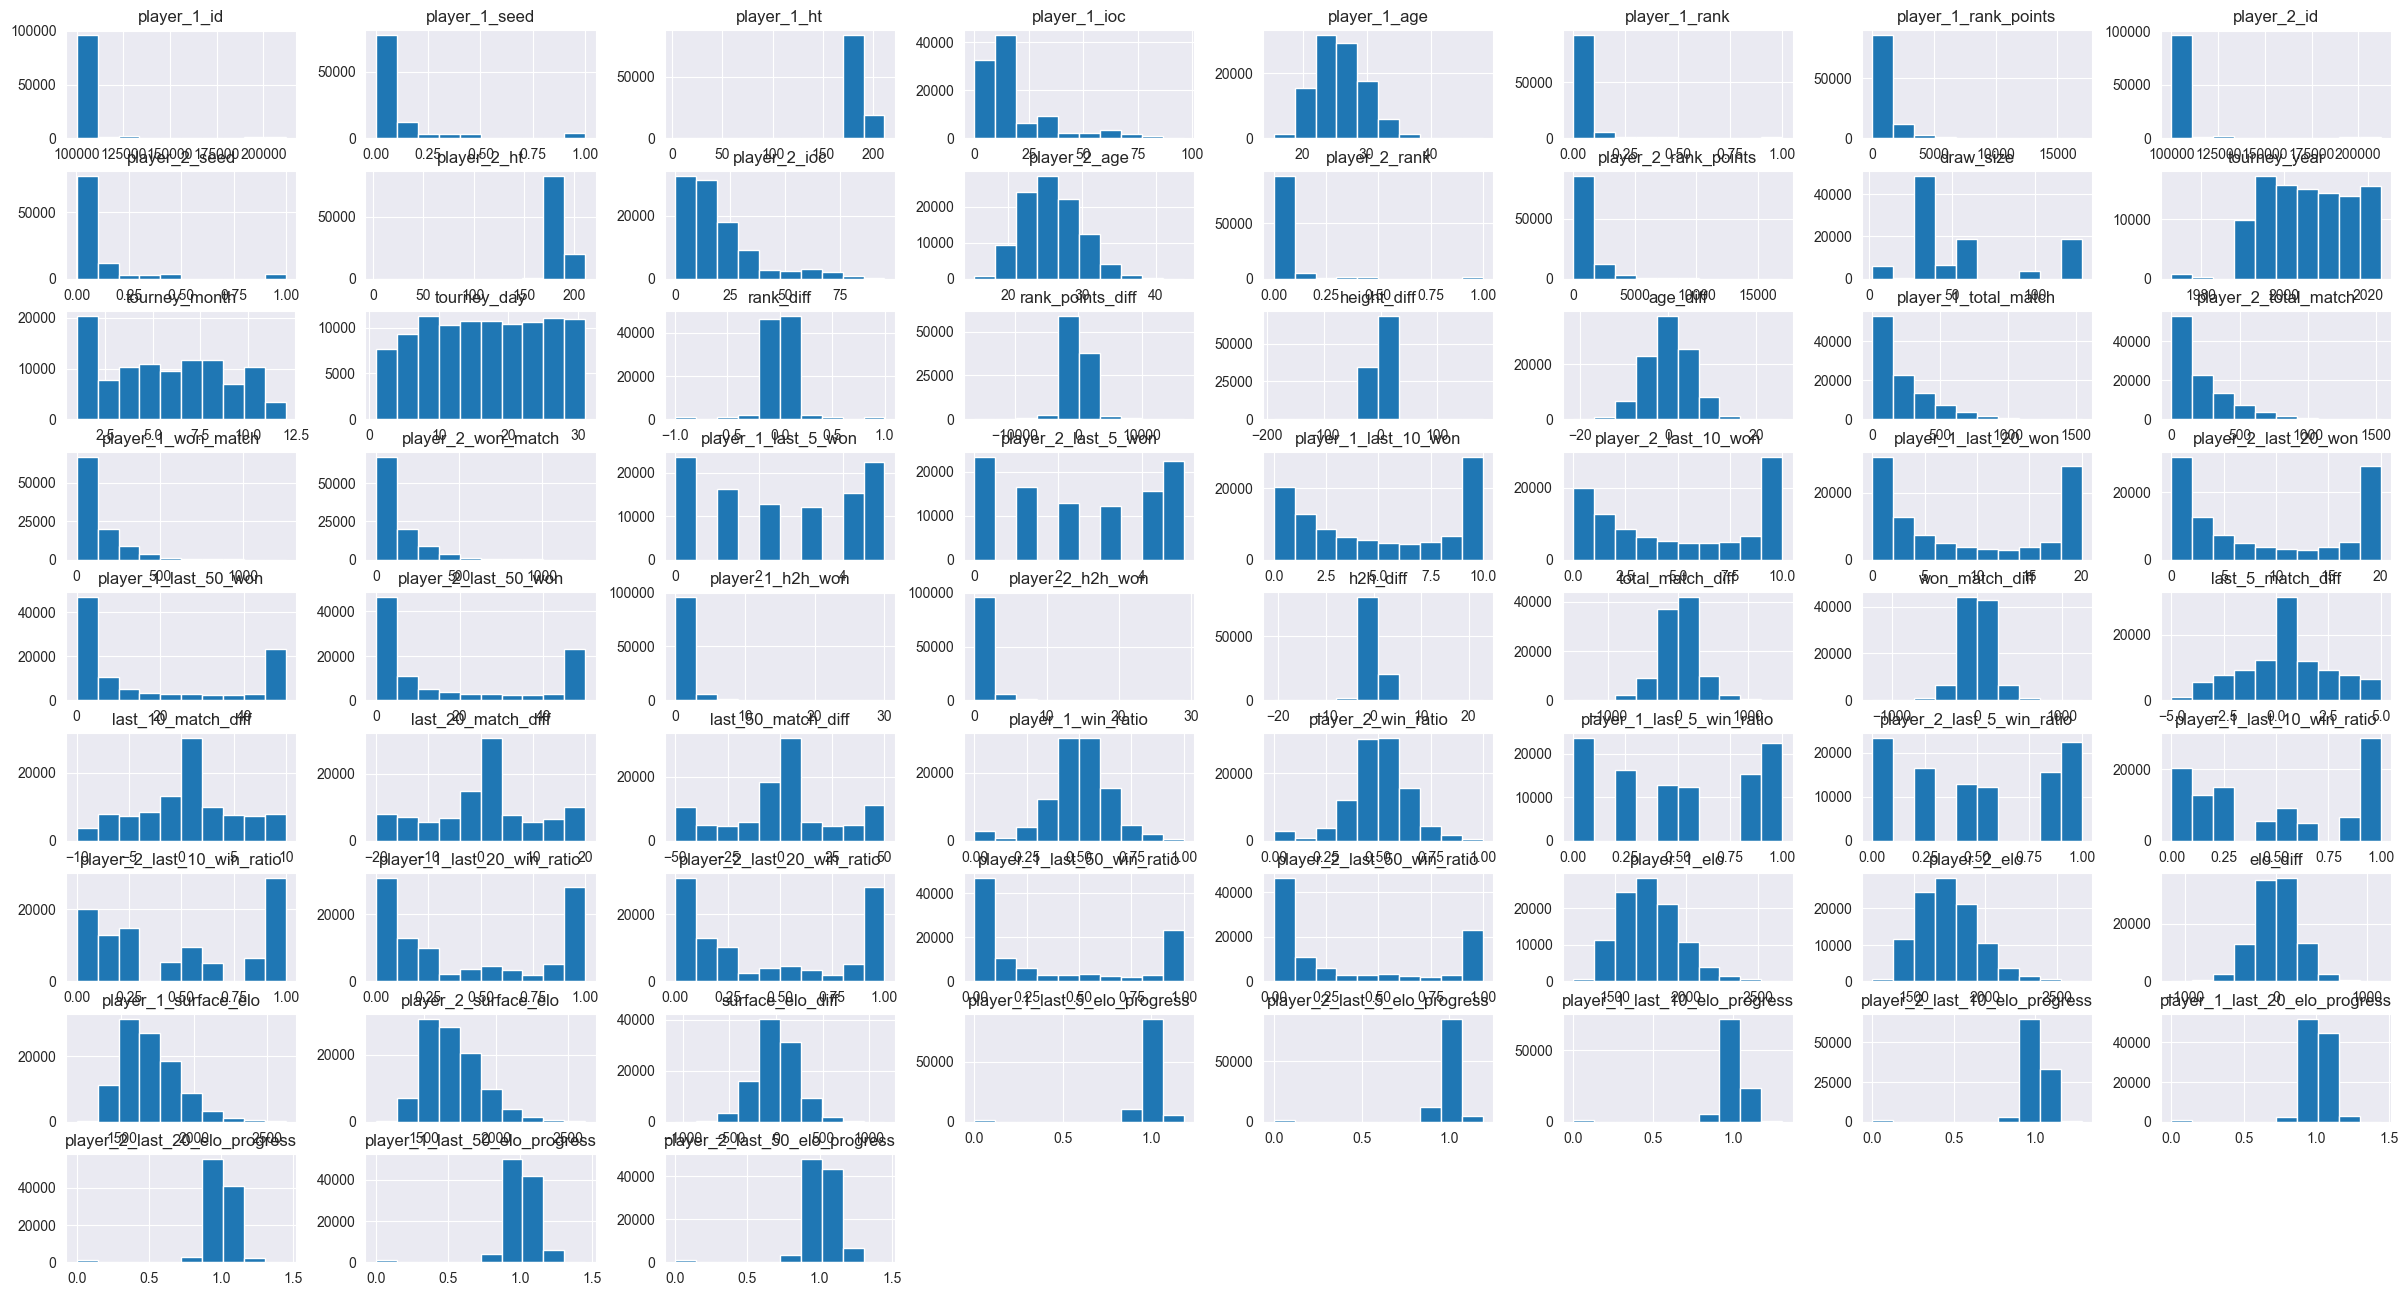

In [7]:
train_data = x_train.join(y_train)
train_data.hist(figsize=(30, 16))

<Axes: >

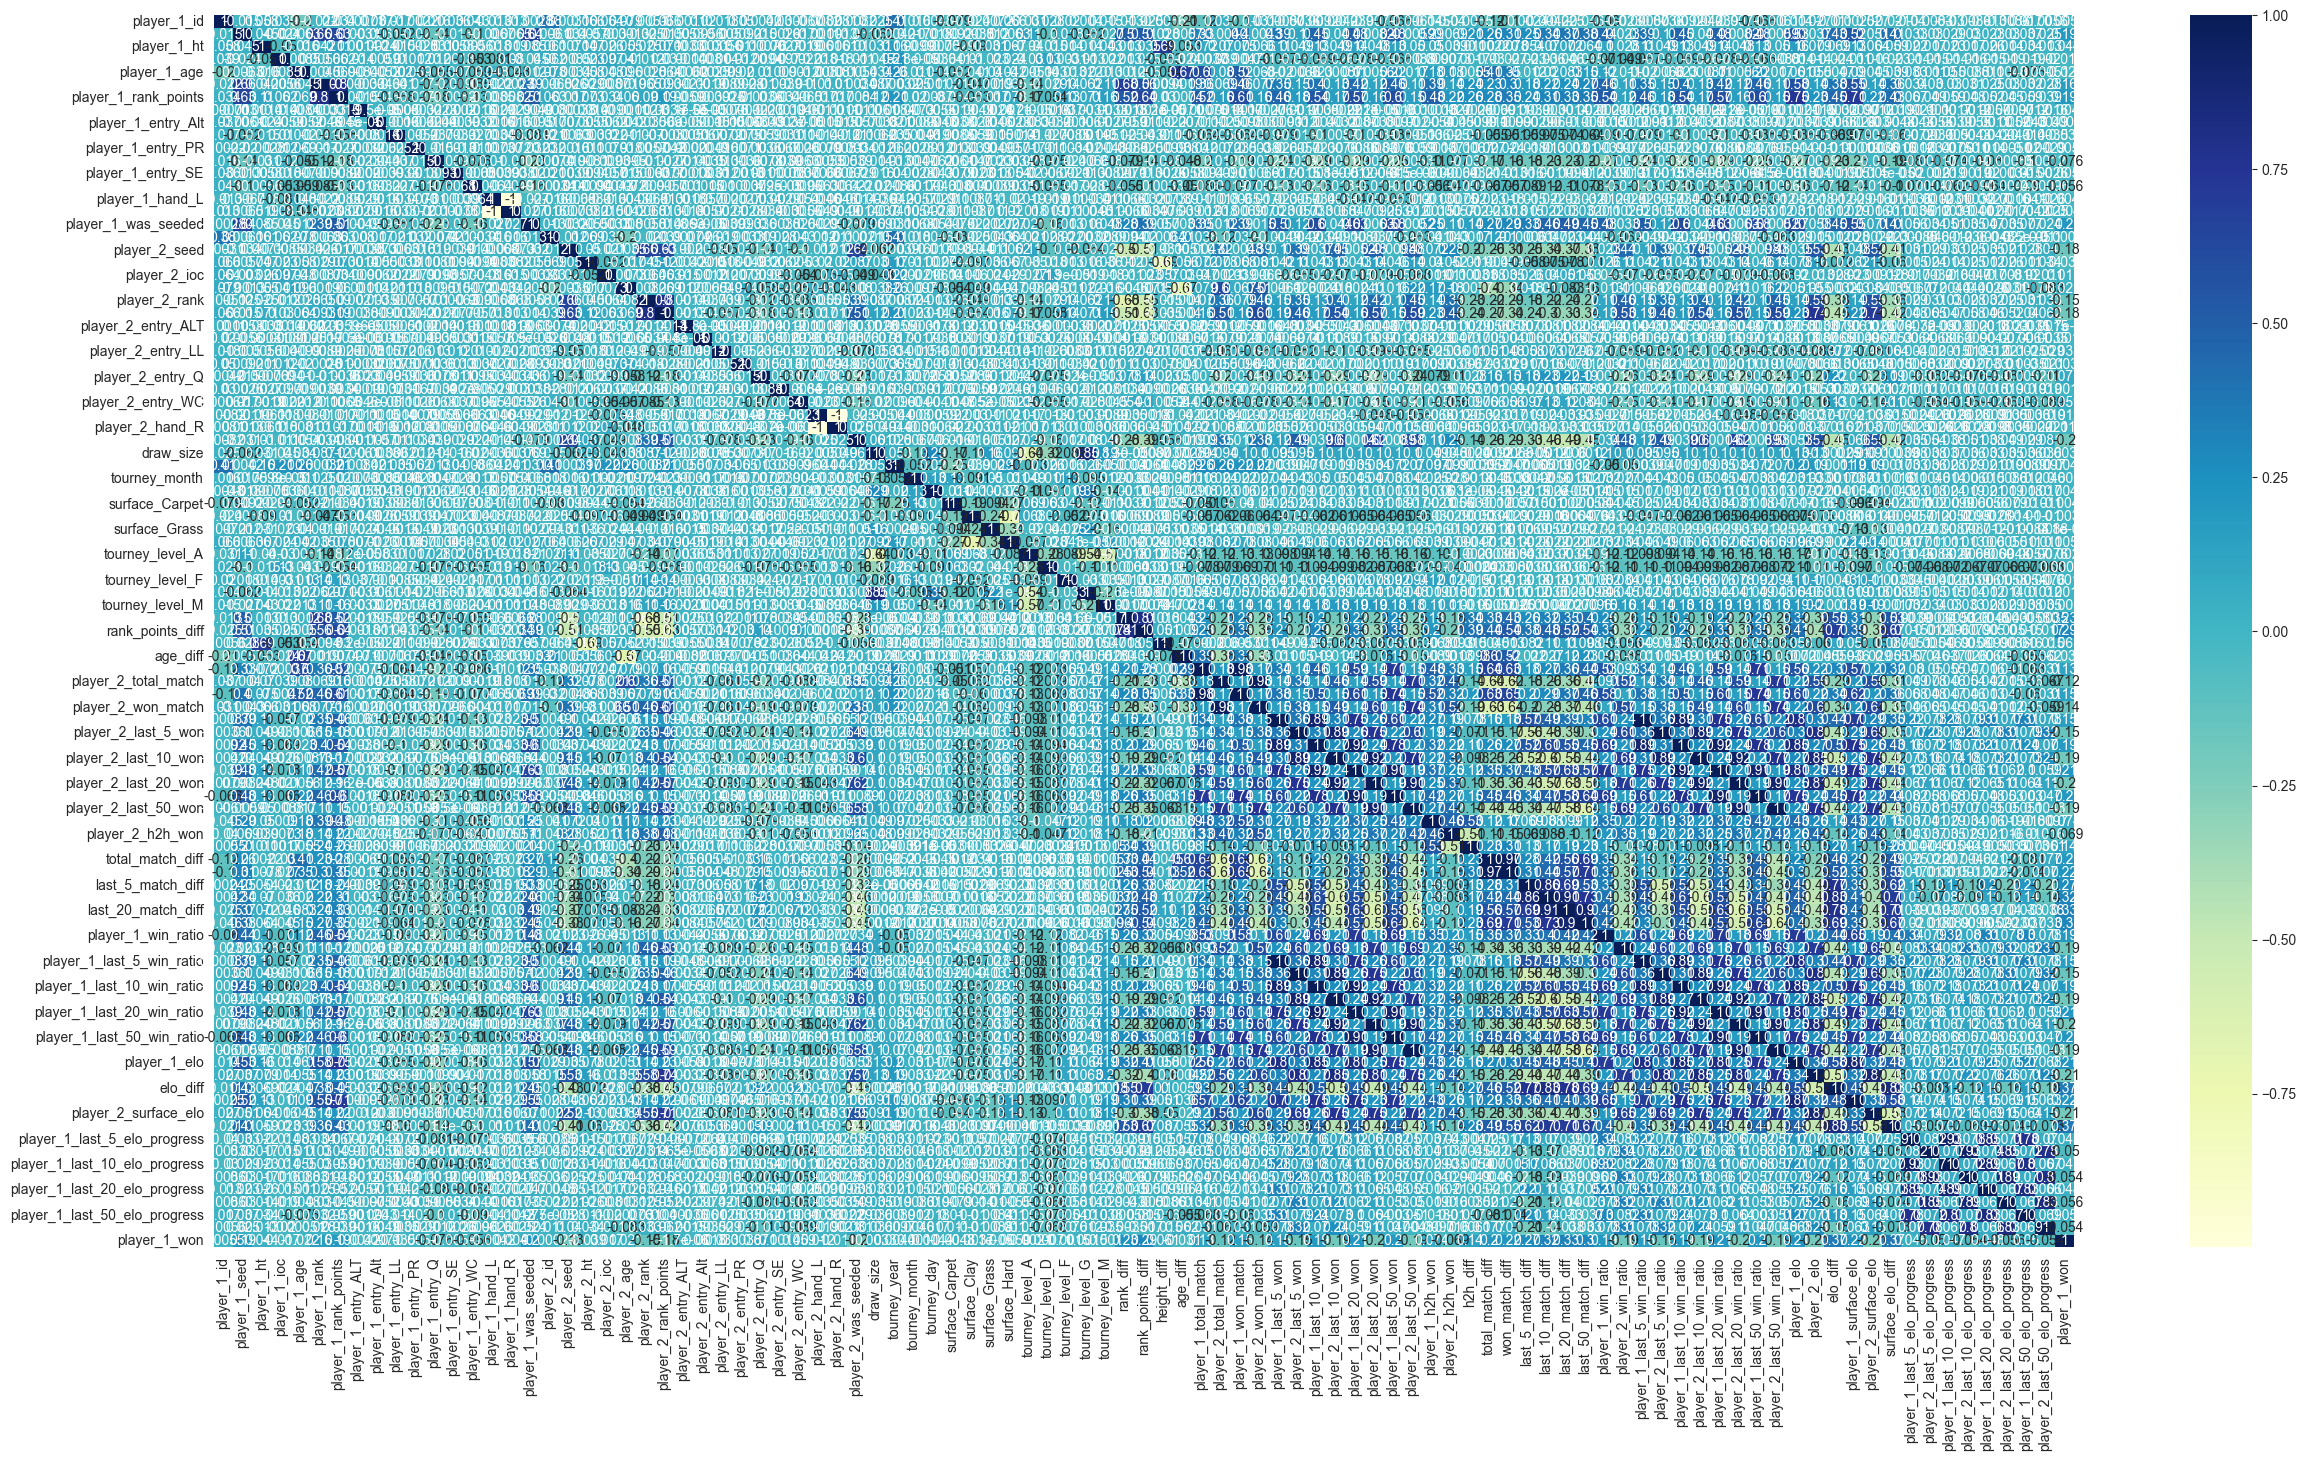

In [8]:
plt.figure(figsize=(30, 16))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
accuracy = forest.score(x_test, y_test)
print(f"Random Forest Model Accuracy -> {accuracy *100}%")

Random Forest Model Accuracy -> 65.4%


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [12]:
accuracy = boosting_model.score(x_test, y_test)
print(f"Boosting Model Accuracy -> {accuracy *100}%")

Boosting Model Accuracy -> 65.76666666666667%


In [13]:
importances = forest.feature_importances_
feature_names = x.columns
importance_list = [[feature, importance] for feature, importance in
                   zip(feature_names, importances)]

importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance * 100}%")

surface_elo_diff: 4.496919026637805%
elo_diff: 3.479757256911306%
rank_diff: 3.2517911632692784%
rank_points_diff: 3.1214943245813234%
player_1_surface_elo: 2.2045518047227874%
last_50_match_diff: 2.178910368427989%
player_2_surface_elo: 2.124052969824544%
age_diff: 1.9991620047301433%
player_1_rank_points: 1.989268271648364%
player_2_elo: 1.9450309682939588%
player_2_rank_points: 1.9100759053000465%
player_1_last_5_elo_progress: 1.9099967067147676%
player_1_elo: 1.9059888523106094%
player_2_last_5_elo_progress: 1.899926563376198%
player_1_win_ratio: 1.8844588719780273%
total_match_diff: 1.8833452238323267%
player_1_rank: 1.8763262322700738%
player_2_last_20_elo_progress: 1.867817036818635%
player_2_last_10_elo_progress: 1.8656753660724195%
player_2_last_50_elo_progress: 1.8636099235580004%
player_1_last_10_elo_progress: 1.8612581249482951%
player_1_last_20_elo_progress: 1.854868590851676%
player_1_last_50_elo_progress: 1.8539747042893857%
player_2_win_ratio: 1.8441445726572363%
player

In [14]:
columns_to_keep = [feature for feature, importance in importance_list if importance > 0.005]
df = df.drop(columns=[column for column in df.columns if column not in columns_to_keep and column != "player_1_won" and "tourney_" not in column])

In [15]:
x_train = df[df["tourney_year"] < 2024].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < 2024]["player_1_won"]

x_test = df[df["tourney_year"] == 2024].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] == 2024]["player_1_won"]

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
accuracy = forest.score(x_test, y_test)
print(f"Random Forest Accuracy After "
      f"Removing Unimportant Features -> {accuracy}")

Random Forest Accuracy After Removing Unimportant Features -> 0.6483333333333333


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
accuracy = model.score(x_test, y_test)
print(f"Boosting Model Accuracy After "
      f"Removing Unimportant Features -> {accuracy}")

Boosting Model Accuracy After Removing Unimportant Features -> 0.6546666666666666
